# <font color = blue>Multiclass classification model using a custom Convolutional Neural Network in tensorflow. </font>
### **Problem Statement:**
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import os
import shutil
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
# # For removing output folders
# pathrm = "/content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# for folder in os.listdir(pathrm):
#   dirc = pathrm + folder + "/output"
#   shutil.rmtree(dirc)

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

train_dir= "/content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_dir = "/content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
data_dir_train = pathlib.Path(train_dir)
data_dir_test = pathlib.Path(test_dir)

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
              train_dir,
              batch_size=batch_size,
              subset='training',
              image_size=(img_height, img_width),
              seed=123,
              validation_split=0.2,
          )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
              train_dir,
              batch_size=batch_size,
              subset='validation',
              image_size=(img_height, img_width),
              seed=123,
              validation_split=0.2,
          )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

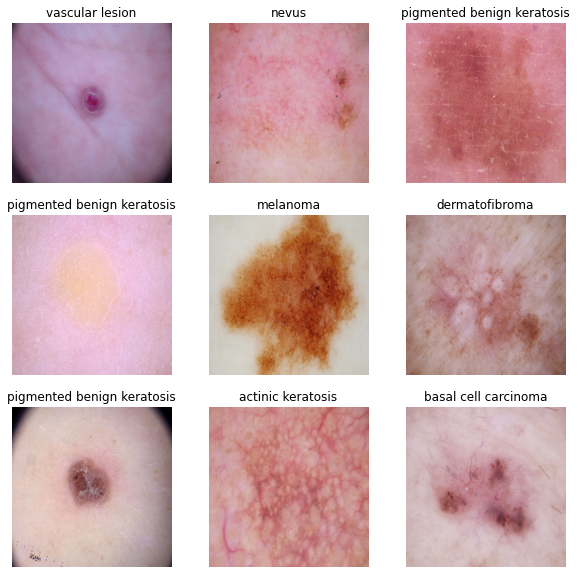

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

num_classes = 9

model1 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model1.build([None,180,180,3]) 

In [ ]:
# View the summary of all layers
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

### Inferences:
- Total Trainable Parameters as per the above first model summary are 1,659,081.

### Train the model

In [ ]:
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 585s 2s/step - loss: 2.0713 - accuracy: 0.1886 - val_loss: 2.0292 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 2.0182 - accuracy: 0.2093 - val_loss: 1.9889 - val_accuracy: 0.2573
Epoch 3/20
56/56 [==============================] - 2s 27ms/step - loss: 1.9396 - accuracy: 0.2779 - val_loss: 1.8363 - val_accuracy: 0.3266
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.7576 - accuracy: 0.3705 - val_loss: 1.6592 - val_accuracy: 0.4161
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5448 - accuracy: 0.4453 - val_loss: 1.4762 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 2s 27ms/step - loss: 1.3915 - accuracy: 0.5134 - val_loss: 1.4504 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3226 - accuracy: 0.5357 - val_loss: 1.5618 - val_accuracy: 0.4586
Epoch 8/20
56

### Visualizing training results

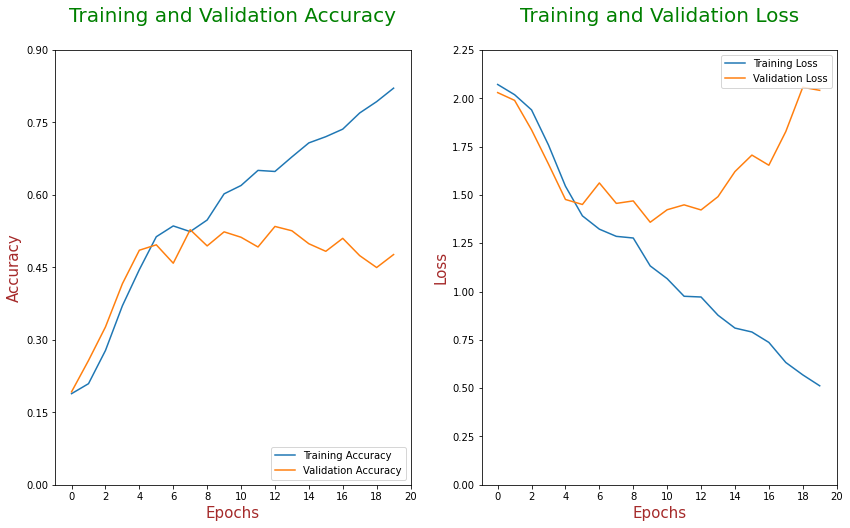

In [ ]:
# To visualize the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy\n',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("Epochs",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Accuracy",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.yticks(np.arange(0.0, 1, 0.15))
plt.xticks(np.arange(0, 22, 2))



plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yticks(np.arange(0, 2.5, 0.25))
plt.xticks(np.arange(0, 22, 2))
plt.legend(loc='upper right')
plt.title('Training and Validation Loss\n',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("Epochs",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Loss",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Inferences:
- Here, it is clearly visible that there is an overfit as validation loss is increasing and training loss is constantly decreasing.
- However, Training Accuuracy is **0.82**, validation loss is **2.04**, and val_accurracy is **0.4765**. 

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))
])

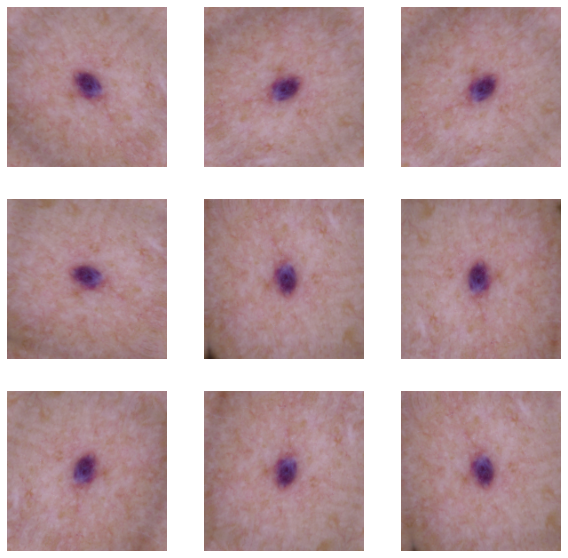

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    aug_image = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(aug_image[0].numpy().astype("uint8"))
    plt.axis('off')

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9

model2 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,  
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
 ## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 53ms/step - loss: 1.8212 - accuracy: 0.3365 - val_loss: 1.5860 - val_accuracy: 0.4407
Epoch 2/20
56/56 [==============================] - 3s 50ms/step - loss: 1.6000 - accuracy: 0.4258 - val_loss: 1.5782 - val_accuracy: 0.4609
Epoch 3/20
56/56 [==============================] - 3s 49ms/step - loss: 1.4467 - accuracy: 0.4994 - val_loss: 1.4838 - val_accuracy: 0.4989
Epoch 4/20
56/56 [==============================] - 3s 51ms/step - loss: 1.4119 - accuracy: 0.4933 - val_loss: 1.4185 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 3s 49ms/step - loss: 1.4016 - accuracy: 0.5017 - val_loss: 1.5657 - val_accuracy: 0.4586
Epoch 6/20
56/56 [==============================] - 3s 49ms/step - loss: 1.4017 - accuracy: 0.5089 - val_loss: 1.4207 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 3s 49ms/step - loss: 1.3256 - accuracy: 0.5307 - val_loss: 1.3892 - val_accuracy: 0.5235
Epoch 8/20
56

### Visualizing the results

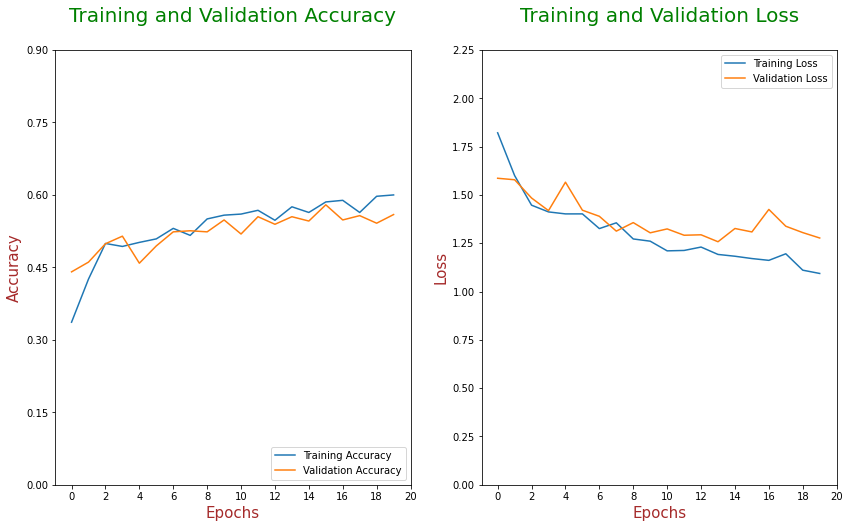

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy\n',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("Epochs",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Accuracy",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.yticks(np.arange(0, 1, 0.15))
plt.xticks(np.arange(0, 22, 2))

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss\n',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("Epochs",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Loss",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.yticks(np.arange(0, 2.5, 0.25))
plt.xticks(np.arange(0, 22, 2))
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Inferences:
- Here, we can see that there is negligible overfit.
- Training Accuuracy is **0.599**, validation loss is **1.27**, and val_accurracy is **0.559**. 

- We can see that the validation loss is less than before **(2.03 vs 1.27)**.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.


class_count = {}

for dir in os.listdir(train_dir):
  class_count[dir] = len(os.listdir(train_dir +'/'+ dir))
class_count

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [ ]:
print("class with least number of samples:",min(class_count, key=class_count.get))
print("class with most number of samples:",max(class_count, key=class_count.get))

class with least number of samples: seborrheic keratosis
class with most number of samples: pigmented benign keratosis


### Inferences:
- After analysis we can say that **seborrheic keratosis** has **least number** of samples.
- Whereas **pigmented benign keratosis** class **dominate** the data with having maximum number of samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset = train_dir + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4B999601C0>: 100%|██████████| 500/500 [00:20<00:00, 24.38 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4B99A76F70>: 100%|██████████| 500/500 [00:23<00:00, 20.97 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4B99A724F0>: 100%|██████████| 500/500 [00:18<00:00, 27.40 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4B98D3A520>: 100%|██████████| 500/500 [01:30<00:00,  5.50 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2155x1958 at 0x7F4B99956E80>: 100%|██████████| 500/500 [01:27<00:00,  5.73 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4B9B7E2F40>: 100%|██████████| 500/500 [00:18<00:00, 26.39 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4B98D14B80>: 100%|██████████| 500/500 [00:41<00:00, 12.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4B99A69DF0>: 100%|██████████| 500/500 [00:18<00:00, 26.96 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4B9B77CEE0>: 100%|██████████| 500/500 [00:18<00:00, 27.24 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027896.jpg_c82932da-3a16-4765-adf4-94dc1dba0a13.jpg',
 '/content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026171.jpg_9a75f398-3566-454a-bbc9-2fccf75169a3.jpg',
 '/content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029713.jpg_449536ea-1100-4d7a-bdfe-366387932d2d.jpg',
 '/content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027950.jpg_d61be0c6-3cb1-4192-beba-dbaa4dd382ea.jpg',
 '/content/gdrive/MyDrive/Projects_t

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [ ]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

- So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Projects_to_be_done/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

num_classes = 9

model3 = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
# epochs = 30
## Your code goes here, use 30 epochs.
epochs = 30
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 41s 236ms/step - loss: 1.8428 - accuracy: 0.2847 - val_loss: 1.4922 - val_accuracy: 0.4388
Epoch 2/30
169/169 [==============================] - 33s 191ms/step - loss: 1.4556 - accuracy: 0.4585 - val_loss: 1.4205 - val_accuracy: 0.4796
Epoch 3/30
169/169 [==============================] - 34s 195ms/step - loss: 1.2630 - accuracy: 0.5276 - val_loss: 1.1682 - val_accuracy: 0.5590
Epoch 4/30
169/169 [==============================] - 33s 189ms/step - loss: 1.1007 - accuracy: 0.5992 - val_loss: 1.0923 - val_accuracy: 0.5976
Epoch 5/30
169/169 [==============================] - 33s 190ms/step - loss: 0.9793 - accuracy: 0.6471 - val_loss: 0.9354 - val_accuracy: 0.6570
Epoch 6/30
169/169 [==============================] - 33s 190ms/step - loss: 0.7855 - accuracy: 0.7240 - val_loss: 0.8717 - val_accuracy: 0.6949
Epoch 7/30
169/169 [==============================] - 33s 190ms/step - loss: 0.6884 - accuracy: 0.7539 - val_loss: 0.8597 - val_ac

#### **Todo:**  Visualize the model results

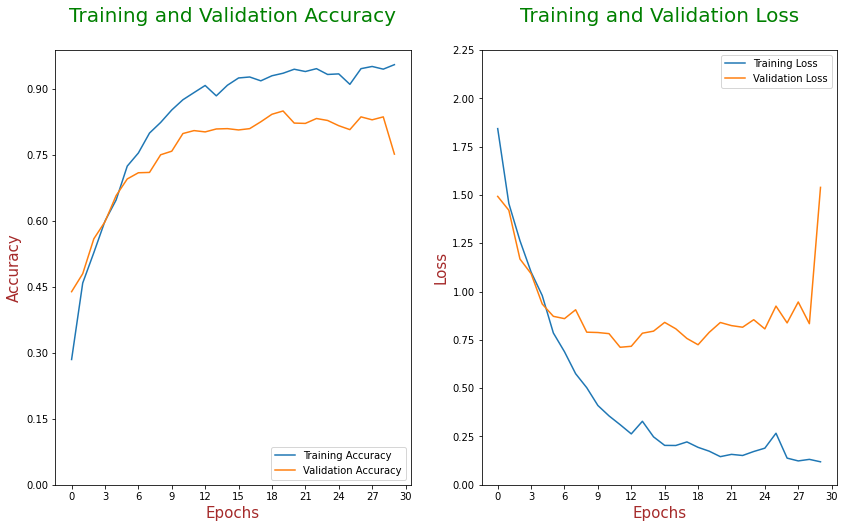

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy\n',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("Epochs",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Accuracy",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.yticks(np.arange(0, 1, 0.15))
plt.xticks(np.arange(0, 33, 3))


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss\n',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("Epochs",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Loss",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.yticks(np.arange(0, 2.5, 0.25))
plt.xticks(np.arange(0, 33, 3))

plt.show()


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Inferences:
- Here, we can see that we got rid of overfitting as validation and training acccuracy both has been increased with reduced validation loss.
- However, Training Accuuracy is approx. **0.95**, validation loss is **0.83**, and val_accurracy is **0.83** at 29th epoch. 

In [ ]:
# Here we can finally see that the undefitting is significantly reduced as the validation loss descresed.

###Summary

- **Model-1** has large gap between training data and validation data, therefore there is a overfitting. However, Validation accuracy is around 47%.

- **Model-2** tried removing overfitting using data augmentation. Reduced gap but validation accuracy improvement is not that much significant(around 56%) because of imbalanced data.

- **Model-3** dealt with imbalanced data and finally we were able to achieve good validation accuracy which is around **83%**.

**Conclusion**

- As per the above analysis a final model-3 is a good model for our problem statement. A Dermatologists can timely detect and do the analysis by evaluating images of the Melanoma (a type of cancer) therefore, number of deaths can be reduced. Such in time and accurate analysis reduces a lot of manual efforts which are required in diagnosis. 

# End of Assignment